# Ecuaciones de una variable

In [6]:
#import some useful packages and some stylish
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *
plt.style.use('seaborn')
#%matplotlib inline #ejecutar esta línea cuando se trabaje en un servidor jupyter
pd.set_option("display.precision", 10) #ejecutar esta línea para mejorar la presición de pandas más dígitos


In [26]:
## MÉTODOS
### Método de gráfico
#### Grafica de funciones
def graficar(f, x_i, x_f, int = 1000):
    fig, ax = plt.subplots()
    x = np.linspace(x_i, x_f, int)
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.grid(True, linestyle='-')
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

### Método de bisección
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de biseccion.
    
'''
---
#### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		Si f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia - número
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
#### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor medio del N-esimo intervalo calculado en el metodo de bissecion.
		El intervalo inicial [a_0,b_0] es dado por [a,b]. Si f(m_n) == 0 para algún valor
		medio m_n = (a_n + b_n)/2, entonces la funcion regresa esa solución. Si todos los
		signos de los valores de f(a_n), f(b_n) y f(m_n) son iguales en cualquier iteracion,
		entonces el metodo de biseccion falla y no devuelve nada.
'''
    
def met_biseccion(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    a_n = a
    b_n = b
    x_n = (a_n + b_n) / 2  # punto medio x_0
    error = abs(b_n - a_n)/2
    lista=[[n, a_n, b_n, x_n, f(x_n), None]] #agrega el dato a la lista
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        if f(a_n) * f(x_n) < 0:
            b_n = x_n
        else:
            a_n = x_n
        error = abs(b_n - a_n)/2
        x_n = (a_n + b_n) / 2
        n += 1
        lista.append([n,a_n, b_n, x_n, f(x_n), error])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'x_n', 'f(x_n)', 'error']).set_index('n')
    return tabla, x_n

def met_regulafalsi(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    a_n = a
    b_n = b
    x_n = b-(f(b)*(b-a))/(f(b)-f(a)) # falsa posición
    error = 1
    lista=[[n, a_n, b_n, x_n, f(x_n), None]] #agrega el dato a la lista
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        if f(a_n) * f(x_n) < 0:
            b_n = x_n
        else:
            a_n = x_n
        x_o = x_n
        x_n = b_n-(f(b_n)*(b_n-a_n))/(f(b_n)-f(a_n))
        error = abs(x_o - x_n)
        n += 1
        lista.append([n,a_n, b_n, x_n, f(x_n),error])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'x_n', 'f(x_n)',
                                         'error_abs']).set_index('n')
    return tabla, x_n

### Método de _regula falsi_
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de la posición falsa.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor donde corta la recta que pasa por los puntos (a,f(a)) y (b,f(b))
'''

def met_regulafalsi_mod(f, a, b, tol, mod, N=100):
    if f(a) * f(b) >= 0:  # intevarlo fallido
            print("El metodo de 'regula falsi' falló.")
            return None
    n = 0
    a_n = a
    b_n = b
    x_n = a - (f(a)*(b-a)) / (f(b)-f(a))
    error = abs(a_n - x_n)
    p = 0
    q = 0
    lista = [[n, a_n, b_n, x_n, f(x_n), None]]
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        x_old = x_n #antiguo
        if f(x_n) == 0:
            print("La solucion exacta fue encontrada: x_n={0:.16f}".format(x_n))
            return None, x_n
        if p == mod:
            x_n = (a_n + b_n) / 2.0
            p = 0
        if q == mod:
            x_n = (a_n + b_n) / 2.0
            q = 0
        if f(a_n) * f(x_n) < 0:
            b_n = x_n
            p += 1
        else:
            a_n = x_n
            q += 1
        x_n = a_n - (f(a_n)*(b_n-a_n)) / (f(b_n)-f(a_n)) #nuevo
        error = abs(x_old - x_n)
        n += 1
        lista.append([n, a_n, b_n, x_n, f(x_n), error])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'x_n', 'f(x_n)',
                                         'error']).set_index('n')
    return tabla , x_n

Sea $f(x) = 1.3 \cos^2(0.2x)+20-3x^2$. Solucionar la ecuación $f(x) = 0$

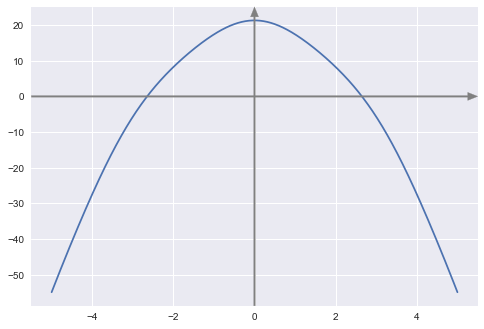

In [22]:
def f(x):
    return 1.3 * np.cos(x)**2 + 20 - 3 * x**2
graficar(f, -5, 5)

In [23]:
tabla, c = met_biseccion(f, 0, 4, 1e-10)
print(c)
tabla

2.6461390266777016


a_n           b_n           x_n            f(x_n)  \
n                                                                
0   0.0000000000  4.0000000000  2.0000000000  8.2251316464e+00   
1   2.0000000000  4.0000000000  3.0000000000 -5.7258893137e+00   
2   2.0000000000  3.0000000000  2.5000000000  2.0843804206e+00   
3   2.5000000000  3.0000000000  2.7500000000 -1.5768646467e+00   
4   2.5000000000  2.7500000000  2.6250000000  3.1098056021e-01   
5   2.6250000000  2.7500000000  2.6875000000 -6.1810341081e-01   
6   2.6250000000  2.6875000000  2.6562500000 -1.4991502357e-01   
7   2.6250000000  2.6562500000  2.6406250000  8.1436141767e-02   
8   2.6406250000  2.6562500000  2.6484375000 -3.4012555680e-02   
9   2.6406250000  2.6484375000  2.6445312500  2.3768384937e-02   
10  2.6445312500  2.6484375000  2.6464843750 -5.1079211695e-03   
11  2.6445312500  2.6464843750  2.6455078125  9.3337709091e-03   
12  2.6455078125  2.6464843750  2.6459960938  2.1138098794e-03   
13  2.6459960938  2.6464843750  2.6462402344 -1.4968343610e-03   
14  2.6459960938  2.6462402344  2.6461181641  3.0854307628e-04   
15  2.6461181641  2.6462402344  2.6461791992 -5.9413181259e-04   
16  2.6461181641  2.6461791992  2.6461486816 -1.4279091078e-04   
17  2.6461181641  2.6461486816  2.6461334229  8.2876947090e-05   
18  2.6461334229  2.6461486816  2.6461410522 -2.9956765758e-05   
19  2.6461334229  2.6461410522  2.6461372375  2.6460144689e-05   
20  2.6461372375  2.6461410522  2.6461391449 -1.7482970307e-06   
21  2.6461372375  2.6461391449  2.6461381912  1.2355927204e-05   
22  2.6461381912  2.6461391449  2.6461386681  5.3038159322e-06   
23  2.6461386681  2.6461391449  2.6461389065  1.7777596604e-06   
24  2.6461389065  2.6461391449  2.6461390257  1.4731369902e-08   
25  2.6461390257  2.6461391449  2.6461390853 -8.6678281619e-07   
26  2.6461390257  2.6461390853  2.6461390555 -4.2602572137e-07   
27  2.6461390257  2.6461390555  2.6461390406 -2.0564717573e-07   
28  2.6461390257  2.6461390406  2.6461390331 -9.5457902916e-08   
29  2.6461390257  2.6461390331  2.6461390294 -4.0363264731e-08   
30  2.6461390257  2.6461390294  2.6461390276 -1.2815949191e-08   
31  2.6461390257  2.6461390276  2.6461390266  9.5770857911e-10   
32  2.6461390266  2.6461390276  2.6461390271 -5.9291238586e-09   
33  2.6461390266  2.6461390271  2.6461390269 -2.4857058634e-09   
34  2.6461390266  2.6461390269  2.6461390267 -7.6399686577e-10   
35  2.6461390266  2.6461390267  2.6461390267  9.6857633025e-11   

               error  
n                     
0                NaN  
1   1.0000000000e+00  
2   5.0000000000e-01  
3   2.5000000000e-01  
4   1.2500000000e-01  
5   6.2500000000e-02  
6   3.1250000000e-02  
7   1.5625000000e-02  
8   7.8125000000e-03  
9   3.9062500000e-03  
10  1.9531250000e-03  
11  9.7656250000e-04  
12  4.8828125000e-04  
13  2.4414062500e-04  
14  1.2207031250e-04  
15  6.1035156250e-05  
16  3.0517578125e-05  
17  1.5258789062e-05  
18  7.6293945312e-06  
19  3.8146972656e-06  
20  1.9073486328e-06  
21  9.5367431641e-07  
22  4.7683715820e-07  
23  2.3841857910e-07  
24  1.1920928955e-07  
25  5.9604644775e-08  
26  2.9802322388e-08  
27  1.4901161194e-08  
28  7.4505805969e-09  
29  3.7252902985e-09  
30  1.8626451492e-09  
31  9.3132257462e-10  
32  4.6566128731e-10  
33  2.3283064365e-10  
34  1.1641532183e-10  
35  5.8207660913e-11

In [24]:
tabla, c = met_regulafalsi(f, 0, 4, 1e-10)
print(c)
tabla

2.6461390266680533


a_n  b_n           x_n         f(x_n)         error_abs
n                                                                   
0   0.0000000000    4  1.7478868153  10.8750199841               NaN
1   1.7478868153    4  2.3870317720   3.5963010151  6.3914495667e-01
2   2.3870317720    4  2.5739053405   1.0491992083  1.8687356854e-01
3   2.5739053405    4  2.6264170708   0.2902366535  5.2511730302e-02
4   2.6264170708    4  2.6407912125   0.0789846572  1.4374141687e-02
5   2.6407912125    4  2.6446917487   0.0213965322  3.9005361751e-03
6   2.6446917487    4  2.6457475605   0.0057889630  1.0558117927e-03
7   2.6457475605    4  2.6460331566   0.0015657083  2.8559611270e-04
8   2.6460331566    4  2.6461103958   0.0004234295  7.7239170102e-05
9   2.6461103958    4  2.6461312840   0.0001145092  2.0888204915e-05
10  2.6461312840    4  2.6461369328   0.0000309669  5.6488331390e-06
11  2.6461369328    4  2.6461384604   0.0000083744  1.5276180436e-06
12  2.6461384604    4  2.6461388736   0.0000022647  4.1311444576e-07
13  2.6461388736    4  2.6461389853   0.0000006124  1.1171869829e-07
14  2.6461389853    4  2.6461390155   0.0000001656  3.0212128799e-08
15  2.6461390155    4  2.6461390237   0.0000000448  8.1702760113e-09
16  2.6461390237    4  2.6461390259   0.0000000121  2.2094912566e-09
17  2.6461390259    4  2.6461390265   0.0000000033  5.9751315007e-10
18  2.6461390265    4  2.6461390266   0.0000000009  1.6158585581e-10
19  2.6461390266    4  2.6461390267   0.0000000002  4.3697934160e-11

In [25]:
tabla, c = met_regulafalsi_mod(f, 0, 4, 1e-10, 2)
print(c)
tabla

2.646139026682818


a_n           b_n           x_n            f(x_n)  \
n                                                                
0   0.0000000000  4.0000000000  1.7478868153  1.0875019984e+01   
1   1.7478868153  4.0000000000  2.3870317720  3.5963010151e+00   
2   2.3870317720  4.0000000000  2.5739053405  1.0491992083e+00   
3   2.3870317720  3.1935158860  2.6119454643  5.0138955831e-01   
4   2.6119454643  3.1935158860  2.6416983005  6.5602327541e-02   
5   2.6416983005  3.1935158860  2.6455639216  8.5042052061e-03   
6   2.6416983005  2.9176070932  2.6458430505  4.3769719429e-03   
7   2.6416983005  2.7796526968  2.6459915256  2.1813654916e-03   
8   2.6459915256  2.7796526968  2.6461341288  7.2437084679e-05   
9   2.6461341288  2.7796526968  2.6461388640  2.4053279688e-06   
10  2.6461341288  2.7128934128  2.6461389450  1.2087224022e-06   
11  2.6461341288  2.6795137708  2.6461389857  6.0564534365e-07   
12  2.6461389857  2.6795137708  2.6461390263  5.0637822824e-09   
13  2.6461390263  2.6795137708  2.6461390267  4.2337688910e-11   
14  2.6461390263  2.6628263986  2.6461390267  2.1184831667e-11   

               error  
n                     
0                NaN  
1   6.3914495667e-01  
2   1.8687356854e-01  
3   3.8040123728e-02  
4   2.9752836180e-02  
5   3.8656211212e-03  
6   2.7912888253e-04  
7   1.4847510707e-04  
8   1.4260319460e-04  
9   4.7352877695e-06  
10  8.0909934752e-08  
11  4.0777784260e-08  
12  4.0609047680e-08  
13  3.3953106993e-10  
14  1.4299672557e-12

## Método de Newton-Rapshon

### Ejemplo

Utilizar el método de _Newton-Rapshon_ para encontrar la solución de la ecuación: $2 \sin(x) - x = 0$, en el intervalo $[-3, -1.5]$ con una exactitud de $10^{-9}$

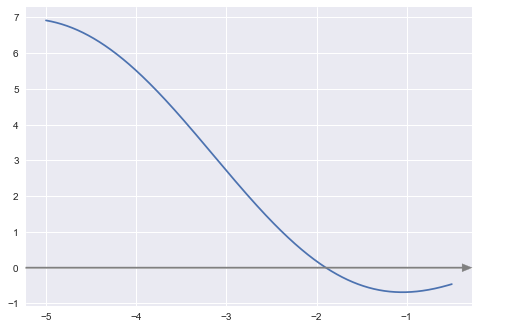

In [42]:
def f(x):
    return 2 * np.sin(x) - x
def df(x):
    return 2 * np.cos(x) - 1
graficar(f, -5, -0.5)

In [41]:
def met_newton_rapshon(f, df, x_0, tol, N=100):
    if df(x_0) == 0:
        print('El método falló (df(x) = 0)')
        return None, None # Fin de la función.
    n = 1
    x_n = x_0 - (f(x_0)/df(x_0))
    error = abs(x_n - x_0)
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        x_0 = x_n
        if df(x_0) == 0:
            print('El método falló (df(x) = 0)', n)
            return None, None # Fin de la función.
        x_n = x_0 - (f(x_0)/df(x_0))
        error = abs(x_n - x_0)
        n =+ 1
    return x_n

In [44]:
x_n = met_newton_rapshon(f, df, 4, 1e-9)
print(x_n)

1.895494267033981
